if beam type is simply supported

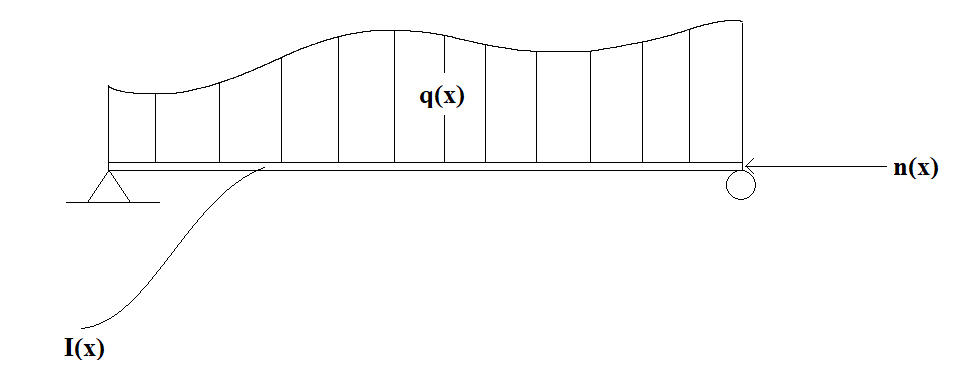

if beam type is cantilever
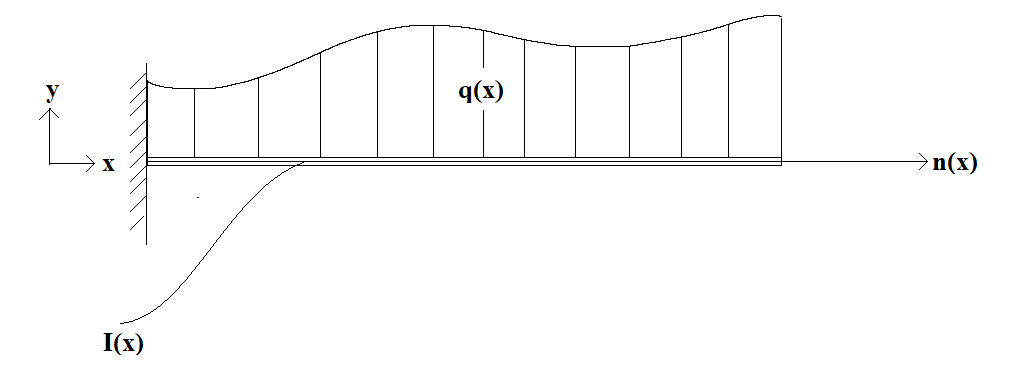

if beam type is double cantilever
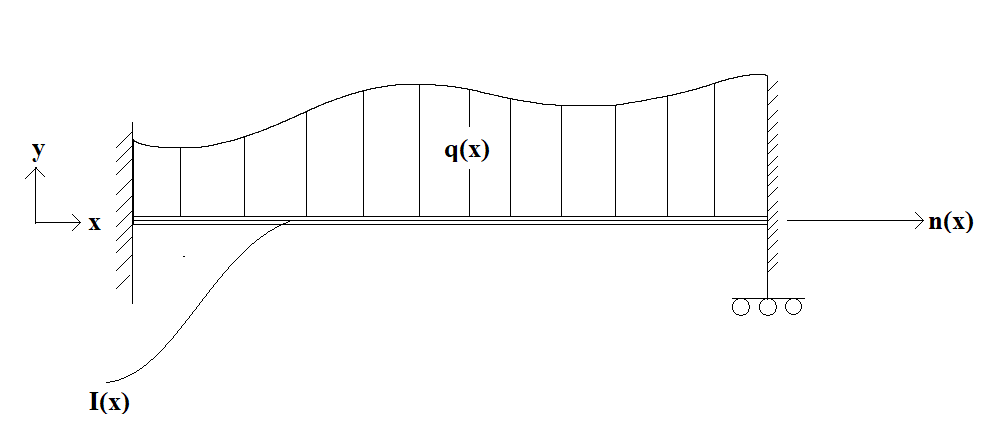

estimated_deflection_equation_is: a1*x*(1 - x/120) + a2*x**2*(1 - x/120)**2 + a3*x**3*(1 - x/120)**3
This is the stiffness matrix :
[[6912000000.00000 0 -0.0156250000000000]
 [0 19906560000000.0 511882971428560.]
 [-0.0156250000000000 511882971428560. 2.04753188571505e+16]]
value of a1 = 0.0125000000000000
value of a2 = 0.000104166666666657
value of a3 = -1.92901234567538e-7
the equation of deflection from 0 < x < L is: 0.0125000000000000 (1-x/beam_length)x + 0.000104166666666657 ((1-x/beam_length)x)^2
+ -1.92901234567538e-7 ((1-x/beam_length)x)^3
maximum deflection is: -0.00313150734982757 inches at x = 60.00777974336822


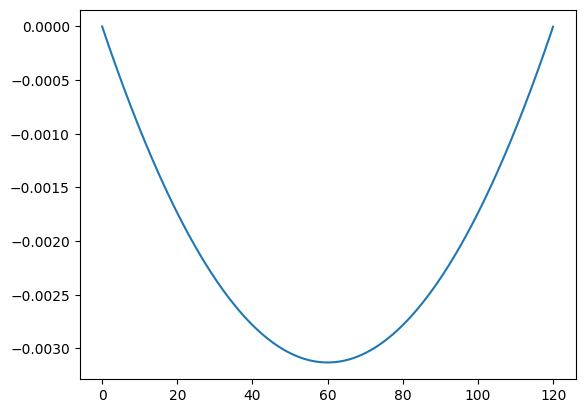

In [ ]:
from sympy.solvers.solveset import linear_eq_to_matrix
#setting up
import numpy as np
import math
from scipy.misc import derivative
import sympy as smp
import matplotlib.pyplot as plt

x = smp.symbols('x',real = True)
a1 = smp.symbols('a1',real = True)
a2 = smp.symbols('a2',real = True)
a3 = smp.symbols('a3',real = True)

#insert type of beam (simply_supported, cantilever, double_cantilever)
#runtime for cantilever is <1 min
#runtimes for simply_supported is ~5 minutes because the fitted function contains trig functions
#runtimes for double_cantilever is ~25 minutes because the fitted function contains trig functions

beam_type = "simply_supported"

#choose material for the beam (units for modulus of elasticity are in psi)

material = "wood"

if material == "wood":
  E = 2*10**6
elif material == "aluminium":
  E = 10*10**6
elif material == "steel":
  E = 30*10**6
else:
  raise ValueError("material type not supported")

#state the length of the beam in inches

beam_length = 120

def estimated_deflection_function(x, a1, a2, a3):
  if beam_type == "simply_supported":
    x = smp.symbols('x',real = True)
    a1 = smp.symbols('a1',real = True)
    a2 = smp.symbols('a2',real = True)
    a3 = smp.symbols('a3',real = True)
    fitted_function = a1 * ((1-x/beam_length)*x) + a2 * ((1-x/beam_length)*x)**2  + a3*((1-x/beam_length)*x)**3
  elif beam_type == "cantilever":
    x = smp.symbols('x',real = True)
    a1 = smp.symbols('a1',real = True)
    a2 = smp.symbols('a2',real = True)
    a3 = smp.symbols('a3',real = True)
    fitted_function = a1 * (x)**2 + a2 * (x)**3  + a3 * (x)**4
  elif beam_type == "double_cantilever":
    x = smp.symbols('x',real = True)
    a1 = smp.symbols('a1',real = True)
    a2 = smp.symbols('a2',real = True)
    a3 = smp.symbols('a3',real = True)
    fitted_function = a1*(1-smp.cos(2*math.pi*x/beam_length)) + a2*(1-smp.cos(2*math.pi*x/beam_length))**2  + a3*(1-smp.cos(2*math.pi*x/beam_length))**3
  else:
    raise ValueError("beam type not supported")

  return fitted_function

def loading_function(x):
#insert a function that represents loading applied to beam into variable "loading_equation" where q_o is in lbs/in

  x = smp.symbols('x',real = True)
  q_o = 100 / 12
  loading_equation = (-x + beam_length)

  return q_o * loading_equation

def axial_loading_function(x):
#insert a function that represents axial loads applied to beam into variable "axial_loading_equation" where n_o is in lbs/in

  x = smp.symbols('x',real = True)
  n_o = 0
  axial_loading_equation = x

  return n_o * axial_loading_equation

def inertia_function(x):
#insert cross-sectional dimensions of the beam into variables "b" and "b" where b and h are in inches
#the cross-section of the beam for this solver is assumed to be rectangular

  x = smp.symbols('x',real = True)
  b = 12
  h = 12

  interia_equation = (1/12)*b*h**3

  return interia_equation

print("estimated_deflection_equation_is:", estimated_deflection_function(1,1,1,1))

#calculation of potential energy in beam

def potential_energy(loading_function, axial_loading_function, inertia_function):

  total_potential_moment_energy = smp.integrate( ((E*inertia_function(1)) / 2) * (smp.diff(estimated_deflection_function(1, 1, 1, 1), x, 2))**2, x)

  total_potential_axial_energy = smp.integrate((axial_loading_function(1) / 2) * (smp.diff(estimated_deflection_function(1, 1, 1, 1), x))**2, x)

  work_done_by_loading = smp.integrate(loading_function(1)*estimated_deflection_function(1, 1, 1, 1), x)

  total_potential_energy = total_potential_moment_energy + total_potential_axial_energy - work_done_by_loading

  return total_potential_energy.simplify()

total_potential_energy = smp.integrate(potential_energy(loading_function, axial_loading_function, inertia_function),(x, 0, beam_length))

#taking partial derivative wrt to each coefficient

total_potential_energy_partial_a1 = smp.diff(total_potential_energy, a1).evalf()

total_potential_energy_partial_a2 = smp.diff(total_potential_energy, a2).evalf()

total_potential_energy_partial_a3 = smp.diff(total_potential_energy, a3).evalf()

turning_lin_sys_eq_to_matrix = []

turning_lin_sys_eq_to_matrix.append(total_potential_energy_partial_a1)

turning_lin_sys_eq_to_matrix.append(total_potential_energy_partial_a2)

turning_lin_sys_eq_to_matrix.append(total_potential_energy_partial_a3)

stiffness_matrix = linear_eq_to_matrix(turning_lin_sys_eq_to_matrix, [a1,a2,a3])

opposite_matrix = (stiffness_matrix[1])

#solving system of linear equations

solving_stiffness_matrix = (stiffness_matrix[0])

a_n = solving_stiffness_matrix.LUsolve(opposite_matrix)


a1 = a_n[0].evalf()
a2 = a_n[1].evalf()
a3 = a_n[2].evalf()

print("This is the stiffness matrix :")
print(np.array(solving_stiffness_matrix.evalf()))

print("value of a1 =" , a1)
print("value of a2 =" , a2)
print("value of a3 =" , a3)

#plotting and deflections

if beam_type == "simply_supported" :
  print("the equation of deflection from 0 < x < L is:", a1, "(1-x/beam_length)x +", a2,"((1-x/beam_length)x)^2")
  print("+",a3, "((1-x/beam_length)x)^3")
elif beam_type == "cantilever" :
  print("the equation of deflection from 0 < x < L is:", a1, "x^2 +", a2, "x^3 +", a3, "x^4")
elif beam_type == "double_cantilever" :
  print("the equation of deflection from 0 < x < L is:", a1, "(1-cos(x)) +", a2, "(1-cos(x))^2 +", a3, "(1-cos(x))^3")


interval = 0.001
x_values = np.arange(0,math.pi,interval) * (beam_length/math.pi)

y = []
for x in np.arange(0,math.pi,interval):
  if beam_type == "simply_supported":
    deflection = a1 * ((1-(x/math.pi))*(x/math.pi)) + a2 * ((1-(x/math.pi))*(x/math.pi))**2  + a3*((1-(x/math.pi))*(x/math.pi))**3
  elif beam_type == "cantilever":
    deflection = a1 * (x)**2 + a2 * (x)**3  + a3 * (x)**4
  elif beam_type == "double_cantilever":
    deflection = a1 * (1-math.cos(2*x)) + a2 * (1-math.cos(2*x))**2  + a3*(1-math.cos(2*x))**3

  y.append(-deflection)

plt.plot(x_values,y)

deflection_information = []

deflection_information = np.column_stack((x_values, y))

maximum_deflection = deflection_information[deflection_information[:,1] == min(deflection_information[:,1]) , : ]

print("maximum deflection is:", maximum_deflection[0,1], "inches at x =", maximum_deflection[0,0])